### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [1]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [3]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

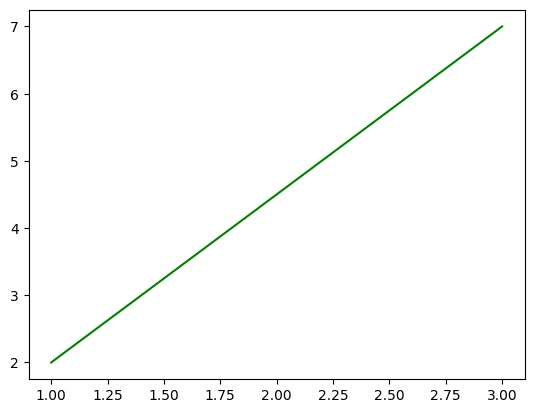

In [4]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

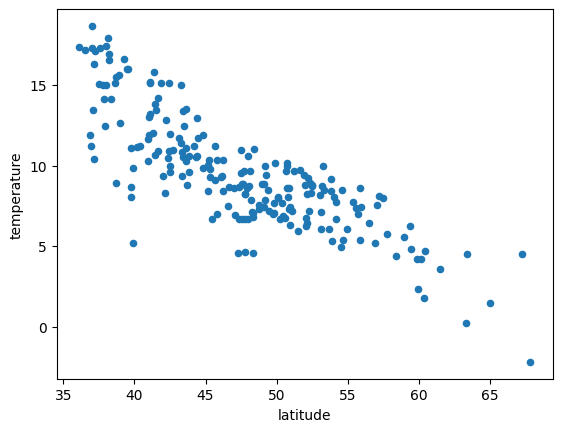

In [5]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

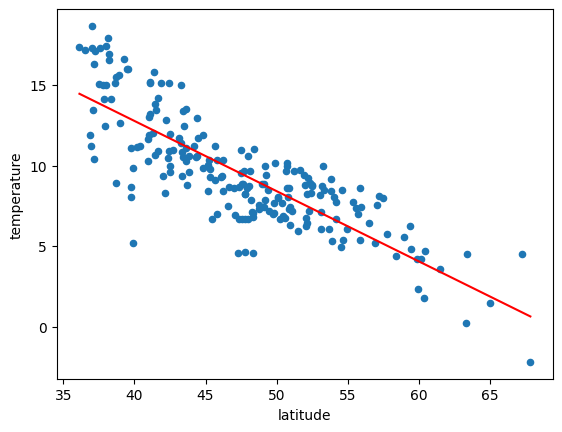

In [6]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [7]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


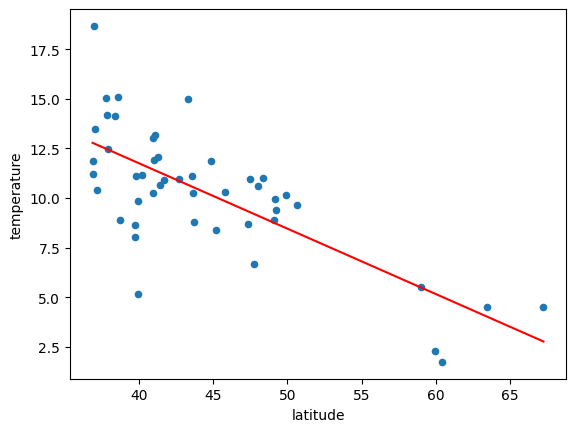

In [8]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [9]:
train.head()

,city,country,latitude,longitude,temperature
3,Adana,Turkey,36.99,35.32,18.67
6,Amiens,France,49.90,2.30,10.17
10,Angers,France,47.48,-0.53,10.98
11,Ankara,Turkey,39.93,32.86,9.86
12,Antalya,Turkey,36.89,30.70,11.88


In [10]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): Antalya


/tmp/ipython-input-1798674423.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
/tmp/ipython-input-1798674423.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual temperature:', float(city.temperature))


Predicted temperature: 12.783202567297907
Actual temperature: 11.88
Enter city name (or "quit" to quit): Ankara
Predicted temperature: 11.781408903324248
Actual temperature: 9.86
Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [12]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

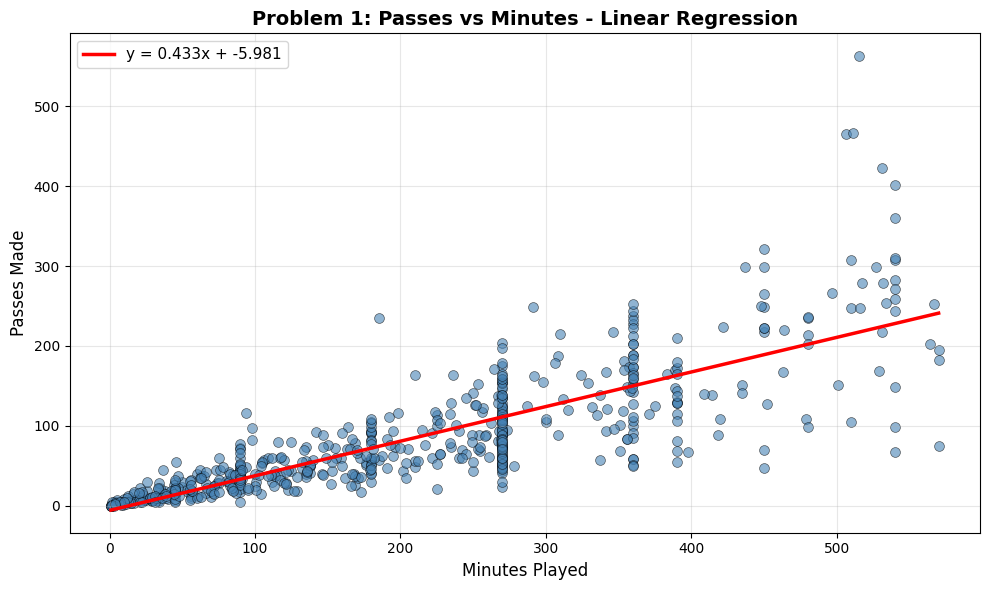

In [24]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).

plt.figure(figsize=(10, 6))
plt.scatter(players.minutes, players.passes, alpha=0.6, s=50,
            edgecolors='black', linewidth=0.5, color='steelblue')

a, b = np.polyfit(players.minutes, players.passes, 1)

x1 = min(players.minutes)
x2 = max(players.minutes)
plt.plot([x1, x2], [a*x1 + b, a*x2 + b], color='red', linewidth=2.5,
         label=f'y = {a:.3f}x + {b:.3f}')

plt.xlabel('Minutes Played', fontsize=12)
plt.ylabel('Passes Made', fontsize=12)
plt.title('Problem 1: Passes vs Minutes - Linear Regression',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [25]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
r_passes = np.corrcoef(players.minutes, players.passes)[1, 0]
r_tackles = np.corrcoef(players.minutes, players.tackles)[1, 0]
r_shots = np.corrcoef(players.minutes, players.shots)[1, 0]
r_saves = np.corrcoef(players.minutes, players.saves)[1, 0]

print("Correlation coefficient for passes versus minutes:  {:.6f}".format(r_passes))
print("Correlation coefficient for tackles versus minutes: {:.6f}".format(r_tackles))
print("Correlation coefficient for shots versus minutes:   {:.6f}".format(r_shots))
print("Correlation coefficient for saves versus minutes:   {:.6f}".format(r_saves))

Correlation coefficient for passes versus minutes:  0.815119
Correlation coefficient for tackles versus minutes: 0.610673
Correlation coefficient for shots versus minutes:   0.407923
Correlation coefficient for saves versus minutes:   0.228477


In [26]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
positions = ['forward', 'midfielder', 'defender', 'goalkeeper']

for position in positions:
    print(f"{position.upper()}S:")
    pos_data = players[players.position == position]

    if len(pos_data) > 1:
        r_p = np.corrcoef(pos_data.minutes, pos_data.passes)[1, 0]
        r_t = np.corrcoef(pos_data.minutes, pos_data.tackles)[1, 0]
        r_sh = np.corrcoef(pos_data.minutes, pos_data.shots)[1, 0]

        print(f"  Passes vs Minutes:  r = {r_p:.6f}")
        print(f"  Tackles vs Minutes: r = {r_t:.6f}")
        print(f"  Shots vs Minutes:   r = {r_sh:.6f}")

        if position == 'goalkeeper':
            r_sv = np.corrcoef(pos_data.minutes, pos_data.saves)[1, 0]
            print(f"  Saves vs Minutes:   r = {r_sv:.6f}")
        else:
            print(f"  Saves vs Minutes:   N/A (only goalkeepers make saves)")

    print()

FORWARDS:
  Passes vs Minutes:  r = 0.887888
  Tackles vs Minutes: r = 0.574709
  Shots vs Minutes:   r = 0.848180
  Saves vs Minutes:   N/A (only goalkeepers make saves)

MIDFIELDERS:
  Passes vs Minutes:  r = 0.865430
  Tackles vs Minutes: r = 0.779309
  Shots vs Minutes:   r = 0.536037
  Saves vs Minutes:   N/A (only goalkeepers make saves)

DEFENDERS:
  Passes vs Minutes:  r = 0.891885
  Tackles vs Minutes: r = 0.695987
  Shots vs Minutes:   r = 0.362360
  Saves vs Minutes:   N/A (only goalkeepers make saves)

GOALKEEPERS:
  Passes vs Minutes:  r = 0.801681
  Tackles vs Minutes: r = 0.247935
  Shots vs Minutes:   r = -0.189261
  Saves vs Minutes:   r = 0.620134



Training data: 58 players
  • Greece: 19 players
  • USA: 19 players
  • Portugal: 20 players

✓ Plot saved: problem4_solution.png


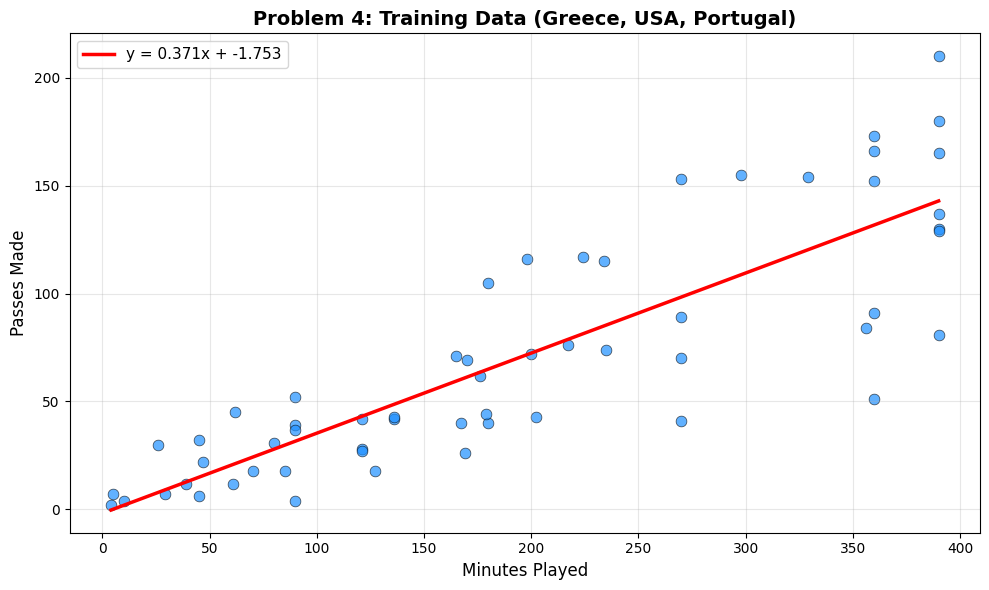

In [27]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal
train = players[(players.team == 'Greece') |
                (players.team == 'USA') |
                (players.team == 'Portugal')]

print(f"Training data: {len(train)} players")
print(f"  • Greece: {len(train[train.team == 'Greece'])} players")
print(f"  • USA: {len(train[train.team == 'USA'])} players")
print(f"  • Portugal: {len(train[train.team == 'Portugal'])} players\n")

plt.figure(figsize=(10, 6))
plt.scatter(train.minutes, train.passes, alpha=0.7, s=60,
            c='dodgerblue', edgecolors='black', linewidth=0.5)

# Compute training regression
a_train, b_train = np.polyfit(train.minutes, train.passes, 1)

x1 = min(train.minutes)
x2 = max(train.minutes)
plt.plot([x1, x2], [a_train*x1 + b_train, a_train*x2 + b_train],
         color='red', linewidth=2.5,
         label=f'y = {a_train:.3f}x + {b_train:.3f}')

plt.xlabel('Minutes Played', fontsize=12)
plt.ylabel('Passes Made', fontsize=12)
plt.title('Problem 4: Training Data (Greece, USA, Portugal)',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('problem4_solution.png', dpi=150, bbox_inches='tight')
print("✓ Plot saved: problem4_solution.png")
plt.show()

In [28]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
train = players[(players.team == 'Greece') | (players.team == 'USA') | (players.team == 'Portugal')]
a, b = np.polyfit(train.minutes, train.passes, 1)


while True:
    surname = input('Enter player surname (or "quit" to quit): ').strip()

    # Check for quit command FIRST (case-insensitive)
    if surname.lower() == 'quit':
        break

    player = players[players.surname == surname]

    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        print(f'Multiple players with surname {surname} found. Please be more specific.')
    else:
        minutes = player.iloc[0].minutes
        actual_passes = player.iloc[0].passes
        predicted_passes = a * minutes + b

        print(f'Predicted passes: {predicted_passes:.2f}')
        print(f'Actual passes: {actual_passes}')

Enter player surname (or "quit" to quit): Saifi
Predicted passes: 3.81
Actual passes: 3
Enter player surname (or "quit" to quit): Cahill
Predicted passes: 52.39
Actual passes: 39
Enter player surname (or "quit" to quit): Culina
Predicted passes: 98.38
Actual passes: 153
Enter player surname (or "quit" to quit): Garcia
Predicted passes: 24.95
Actual passes: 24
Enter player surname (or "quit" to quit): quit


In [29]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
train = players[(players.team == 'Greece') | (players.team == 'USA') | (players.team == 'Portugal')]

position_models = {}
for position in ['forward', 'midfielder', 'defender', 'goalkeeper']:
    train_pos = train[train.position == position]
    if len(train_pos) > 1:  # Need at least 2 points for regression
        a, b = np.polyfit(train_pos.minutes, train_pos.passes, 1)
        position_models[position] = (a, b)

while True:
    surname = input('Enter player surname (or "quit" to quit): ').strip()

    # Check for quit command FIRST (case-insensitive)
    if surname.lower() == 'quit':
        break

    player = players[players.surname == surname]

    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        print(f'Multiple players with surname {surname} found. Please be more specific.')
    else:
        position = player.iloc[0].position
        minutes = player.iloc[0].minutes
        actual_passes = player.iloc[0].passes

        if position in position_models:
            a, b = position_models[position]
            predicted_passes = a * minutes + b
            print(f'Position: {position}')
            print(f'Predicted passes: {predicted_passes:.2f}')
            print(f'Actual passes: {actual_passes}')
        else:
            print(f'No trained model for position: {position}')

Enter player surname (or "quit" to quit): Parker
Position: forward
Predicted passes: 15.00
Actual passes: 32
Enter player surname (or "quit" to quit): Thwala
Position: defender
Predicted passes: 2.63
Actual passes: 19
Enter player surname (or "quit" to quit): Sibaya
Position: midfielder
Predicted passes: 45.64
Actual passes: 39
Enter player surname (or "quit" to quit): Weiss
Position: midfielder
Predicted passes: 127.95
Actual passes: 84
Enter player surname (or "quit" to quit): Petras
Position: defender
Predicted passes: -16.59
Actual passes: 0
Enter player surname (or "quit" to quit): quit
